## Hand-Written Digit Reader
## Richard Cooke
## G00331787

### Approach of this notebook was based on this work: https://www.ics.uci.edu/~mohamadt/keras_mnist.html#Load-data-set.

## Making The Necessary Imports

In [1]:
# Used to plot data
import numpy as np
import matplotlib.pyplot as plt

# Used to create the Neural network
import keras as kr
import gzip

Using TensorFlow backend.


## Loading and Decompressing the dataset

In [2]:
# Importing the the mnist dataset
# Dataset used by the neural network
(train_img, train_lbl), (test_img, test_lbl) = kr.datasets.mnist.load_data()

# Reshaping the data using normalisation
# Original data is [0-255]. Scale it to range [0,1].
train_img = train_img.reshape(60000, 784)
test_img = test_img.reshape(10000, 784)
train_img = train_img/255
test_img = test_img/255 

# mnist dataset contains 10 different digits
digits= 10

# Passed the labels to one hot vecotrs with a vector size of 10
train_lbl = kr.utils.np_utils.to_categorical(train_lbl, digits)
test_lbl = kr.utils.np_utils.to_categorical(test_lbl, digits)

print("One hot vector at index 5 of training labels ", train_lbl[5])

One hot vector at index 5 of training labels  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


## Displaying the images from the datasets

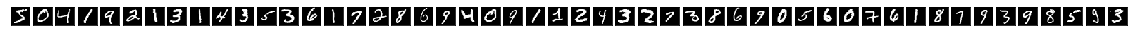

In [3]:
# Plotting examples of the data in the set
plt.figure(1, figsize=(20,10))

# For loop that will iterate 50 times to display the first 50 images in the dataset
for i in range(50):
    plt.subplot(1,50,i+1)
    
    #shows the relevant image
    plt.imshow(train_img[i].reshape(28,28), cmap='gray', interpolation='nearest')
    
    # Removing label markings from both the x and y axis'
    plt.xticks([])
    plt.yticks([])

## Creating the Neural Network

In [5]:
# Creating the neural netwrok by using the models import from keras
model = kr.models.Sequential()

print("Sequential model created")

# Creating the layers of the netwrok using the Dense call from the layers import
# Creating 3 dense layers
model.add(kr.layers.Dense(256, activation='relu', input_shape=(784,))) # Use input_shape=(28,28) for unflattened data.
model.add(kr.layers.Dense(256, activation='relu'))
model.add(kr.layers.Dense(10, activation='softmax'))

print("Layers added to model")

Sequential model created
Layers added to model


In [6]:
# Prints out a string summary of the model
print("Model Summary")
model.summary()

Model Summary
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Compiles and completes the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print("Model compiled")

Model compiled


## Training the Model

In [8]:
# Batch size is number of samples that will be testsed
# Epochs is the amount of times the test is repeated
history = model.fit(train_img, train_lbl, batch_size=128, epochs=10, verbose=1, validation_data=(test_img, test_lbl))

#Testing with more than 10 epochs pushes model too far to 100% accuracy

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.2603 - accuracy: 0.9255 - val_loss: 0.1152 - val_accuracy: 0.9653
Epoch 2/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0984 - accuracy: 0.9702 - val_loss: 0.0857 - val_accuracy: 0.9739
Epoch 3/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0650 - accuracy: 0.9795 - val_loss: 0.0822 - val_accuracy: 0.9754
Epoch 4/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0475 - accuracy: 0.9854 - val_loss: 0.0782 - val_accuracy: 0.9760
Epoch 5/10
60000/60000 [==============================] - 2s 38us/step - loss: 0.0337 - accuracy: 0.9896 - val_loss: 0.0790 - val_accuracy: 0.9763
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0259 - accuracy: 0.9920 - val_loss: 0.0808 - val_accuracy: 0.9779
Epoch 7/10
60000/60000 [==============================] - 2s 38us/st

## Evaluating Efficiency

In [9]:
# Calculates and displays the loss and accuracy of the model
score = model.evaluate(train_img, train_lbl, verbose=0)
print('Test cross-entropy loss: %0.9f' % score[0])
print('Test accuracy: %0.9f' % score[1])

Test cross-entropy loss: 0.009970751
Test accuracy: 0.996800005


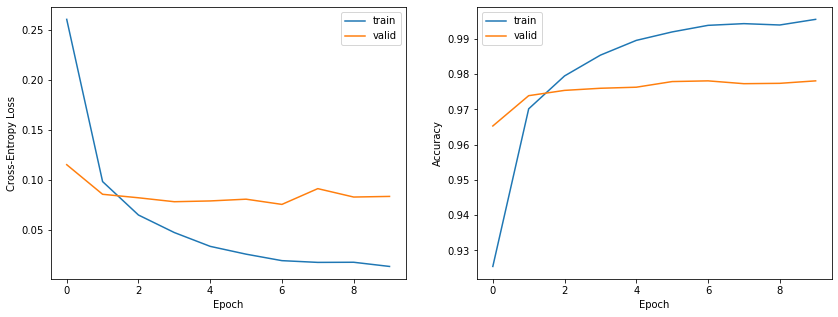

In [10]:
#Plotting the loss trajectory during training
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Cross-Entropy Loss')
plt.legend()

# Plotting the accuracy during training
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

## Saving The Model

In [11]:
model.save('digit_reader.h5')
print("Model Saved.")

Model Saved.


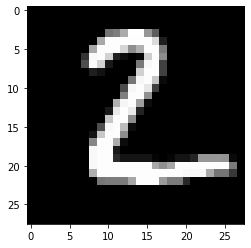

[[2.4735892e-11 2.0321625e-08 1.0000000e+00 3.3373162e-09 4.0064142e-17
  1.0050414e-13 1.0494603e-13 7.8176951e-13 3.2771438e-10 6.0053718e-18]] 
Predicted number:  2


In [21]:
plt.imshow(test_img[25].reshape(28, 28), cmap="gray")
plt.show()

print(model.predict(test_img[25:26]), "\nPredicted number: ", np.argmax(model.predict(test_img[1:2])))

## Other References

* https://keras.io/
* https://www.tensorflow.org/guide/keras/overview
* https://www.python.org/
* https://web.microsoftstream.com/video/8e965392-ccc2-4faa-a755-8d86de6a91d6?referrer=https:%2F%2Flearnonline.gmit.ie%2Fcourse%2Fview.php%3Fid%3D135
* https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
 